## Q1:

In [39]:
import numpy as np
import pandas as pd
np.random.seed(42)
n_samples = 1000
n_features = 5
X = np.random.randn(n_samples, n_features)
coefficients = np.random.randn(n_features)
noise = 0.5
y = X @ coefficients + noise
df = pd.DataFrame(X, columns=[f'Feature{i+1}' for i in range(n_features)])
df['Target'] = y
print(df.head())


   Feature1  Feature2  Feature3  Feature4  Feature5    Target
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -1.485146
1 -0.234137  1.579213  0.767435 -0.469474  0.542560 -0.942286
2 -0.463418 -0.465730  0.241962 -1.913280 -1.724918 -0.159447
3 -0.562288 -1.012831  0.314247 -0.908024 -1.412304 -0.102017
4  1.465649 -0.225776  0.067528 -1.424748 -0.544383 -0.068613


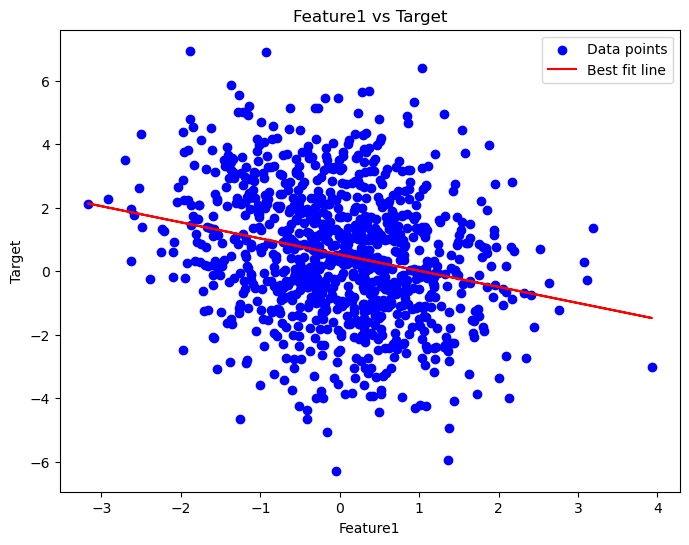

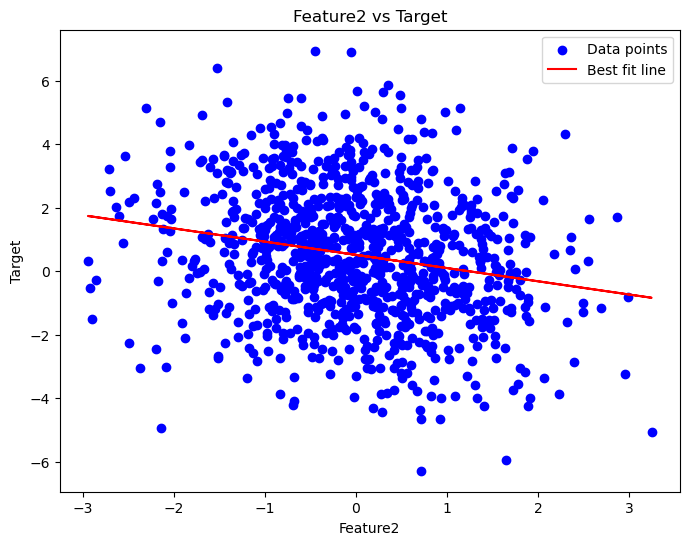

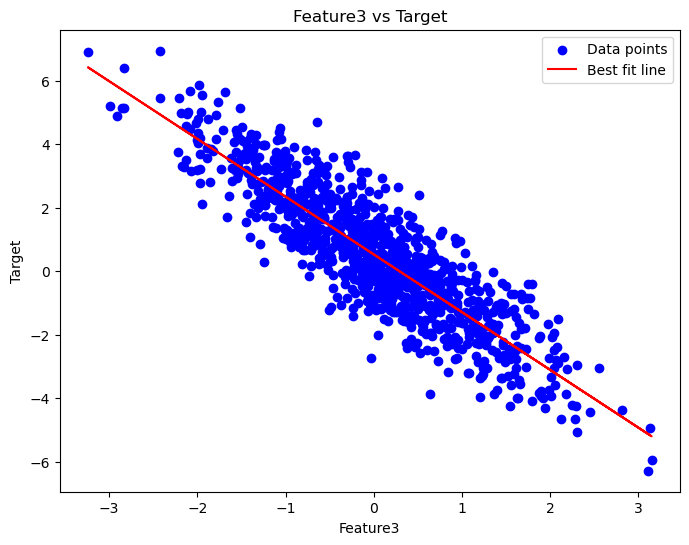

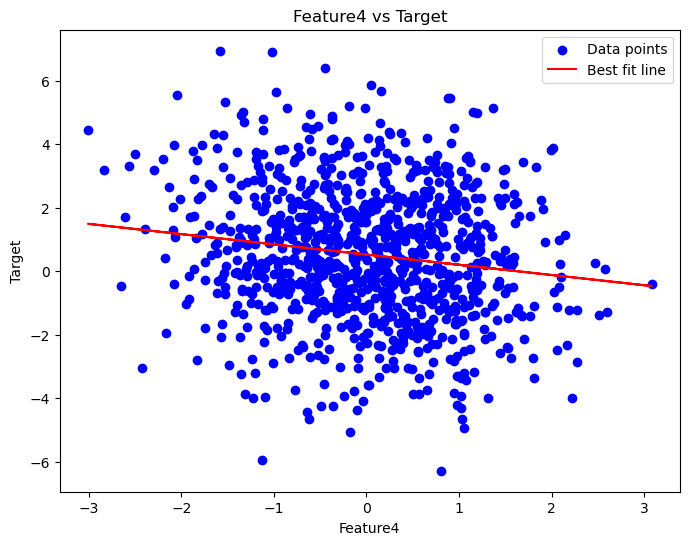

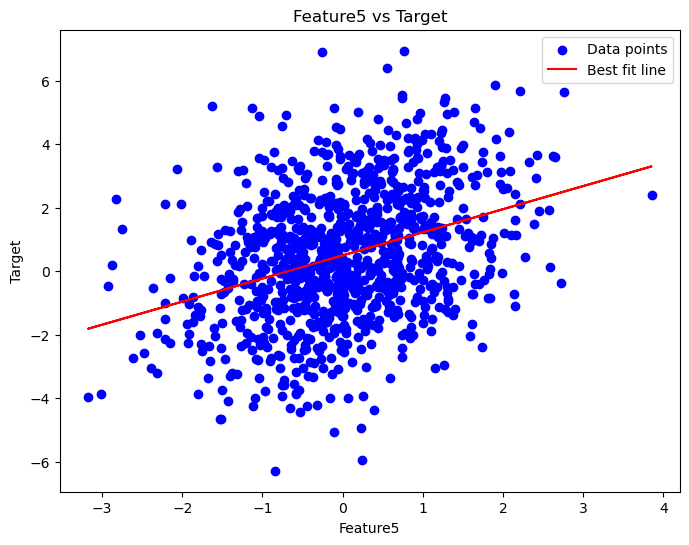

In [38]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

for i in range(n_features):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[f'Feature{i+1}'], df['Target'], color='blue', label='Data points')
    model = LinearRegression()
    X_feature = df[[f'Feature{i+1}']].values
    model.fit(X_feature, df['Target'])
    y_pred = model.predict(X_feature)
    plt.plot(df[f'Feature{i+1}'], y_pred, color='red', label='Best fit line')
    plt.title(f'Feature{i+1} vs Target')
    plt.xlabel(f'Feature{i+1}')
    plt.ylabel('Target')
    plt.legend()
    plt.show()


## Q2:

Text(0, 0.5, 'Feature 2')

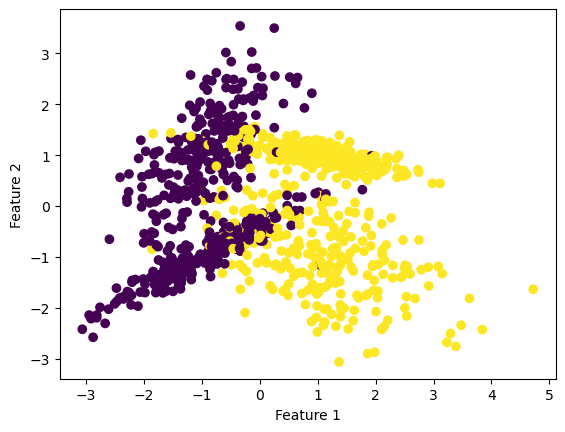

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
x,y=make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


## Q3:

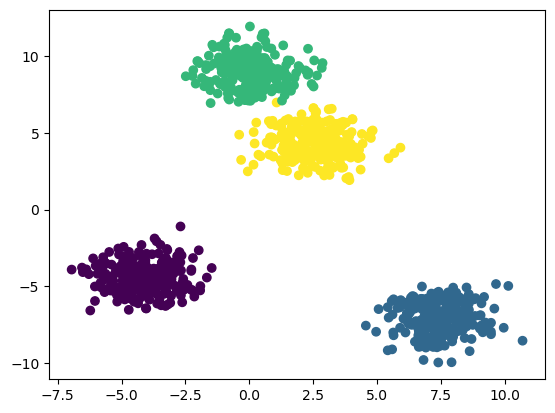

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000,n_features=2,centers=4,cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Q4:

In [20]:
!pip install requests beautifulsoup4 pandas


In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url='https://www.worldometers.info/coronavirus/'
page=requests.get(url)
print(page.status_code)


200


In [22]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(page.text)
table=soup.find('table')

In [23]:
headers=[]
first_row=table.find('tr')

for i in first_row.find_all('th'):
    title=i.text
    headers.append(title)

print(headers)

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [25]:
data=pd.DataFrame(columns=headers)

for j in table.find_all('tr')[1:]:
    row_data=j.find_all('td')
    row=[i.text for i in row_data]
    length=len(data)
    data.loc[length]=row

column_list=['Country,Other', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths','TotalRecovered', 'NewRecovered', 'ActiveCases']
data1 =data[column_list]
data1

,"Country,Other",Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,\nNorth America\n,North America,,"131,889,132",,"1,695,941",,"127,665,129",+350,"2,528,062"
1,\nAsia\n,Asia,,"221,500,265",,"1,553,662",,"205,673,091",,"14,273,512"
2,\nEurope\n,Europe,,"253,406,198",,"2,101,824",,"248,754,104",+474,"2,550,270"
3,\nSouth America\n,South America,,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962"
4,\nOceania\n,Australia/Oceania,,"14,895,771",,"33,015",,"14,752,388",,"110,368"
...,...,...,...,...,...,...,...,...,...,...
242,Total:,South America,,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962"
243,Total:,Australia/Oceania,,"14,895,771",,"33,015",,"14,752,388",,"110,368"
244,Total:,Africa,,"12,860,924",,"258,892",,"12,090,808",,"511,224"
245,Total:,,,721,,15,,706,,0


## Q5:

Original class distribution: Counter({0: 950, 1: 50})
Oversampled class distribution: Counter({0: 950, 1: 237})
Undersampled class distribution: Counter({0: 711, 1: 237})


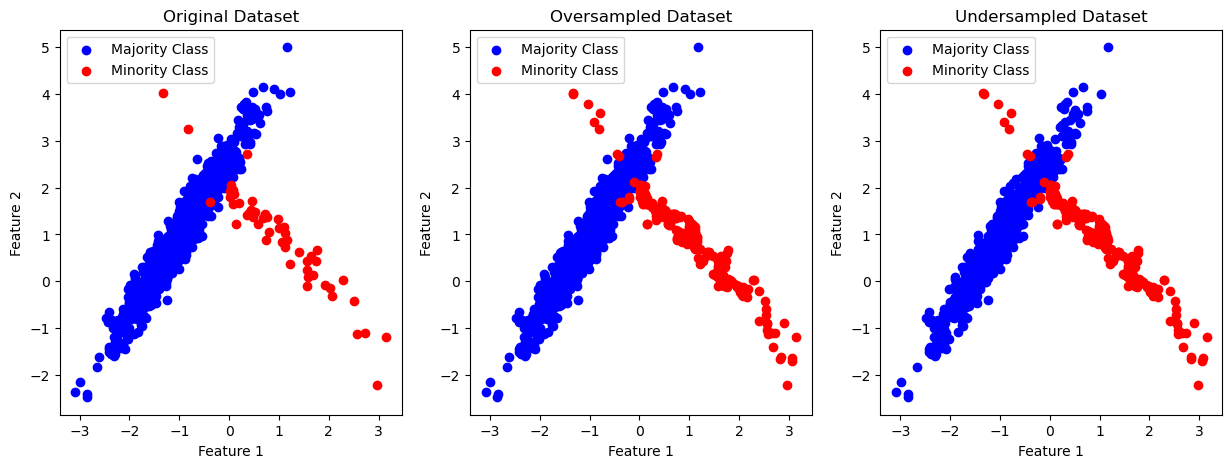

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0, n_informative=2, n_redundant=0, n_repeated=0,random_state=42)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Majority Class')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Minority Class')
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

print("Original class distribution:", Counter(y))

smote = SMOTE(sampling_strategy={1: int(np.sum(y == 0) * 0.05 * 5)}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

plt.subplot(1, 3, 2)
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='blue', label='Majority Class')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='red', label='Minority Class')
plt.title('Oversampled Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

print("Oversampled class distribution:", Counter(y_resampled))

majority_class_size = int(np.sum(y_resampled == 1) * 3)
undersample = RandomUnderSampler(sampling_strategy={0: majority_class_size}, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)

plt.subplot(1, 3, 3)
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='blue', label='Majority Class')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='red', label='Minority Class')
plt.title('Undersampled Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

print("Undersampled class distribution:", Counter(y_resampled))

plt.show()


## Q6:

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing values in the DataFrame:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nDimensions of the training set:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nDimensions of the testing set:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")



Dimensions of the training set:
X_train: (105, 4)
y_train: (105,)

Dimensions of the testing set:
X_test: (45, 4)
y_test: (45,)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print("\nFirst 5 rows of the standardized training set:")
print(pd.DataFrame(X_train_scaled, columns=iris.feature_names).head())



First 5 rows of the standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671802          0.217016           0.951192          0.758890
3           0.912961         -0.022844           0.309096          0.217746
4           1.636440          1.416315           1.301427          1.705891
